#importing packages

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
import seaborn as sns

In [8]:
from scipy import stats

In [9]:
from scipy.stats import pearsonr

In [10]:
from sklearn.preprocessing import LabelEncoder

##IMPORTING DATASET

In [11]:
file_path = r'C:\Users\Jane\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [12]:
df = pd.read_csv(file_path)

In [13]:
print(df.head(10))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL        

In [14]:
#Data Preprocessing:

In [15]:
print("Basic Information:")

Basic Information:


In [16]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#object data type indicates that it is likely stored as text (string)
-float64 means it is a numeric feature that allows for decimal values
-non-null count on each column indicates that that there are no missing values in this column.
-type int64 means it contains integer values
-n=7043 which is total number of entries

#Identify and handle any missing or null values. 

In [17]:
missing_values = df.isnull().sum()

In [18]:
print("\nMissing Values per Feature:")


Missing Values per Feature:


In [19]:
print(missing_values[missing_values > 0])

Series([], dtype: int64)


##condition  applied (missing_values > 0) did not return any true values
indicating that there are no missing values in the dataset for the features  checked. 

# i) encoding Demographic categorical variables;gender

In [21]:
# Initialize the LabelEncoder

In [22]:
label_encoder = LabelEncoder()

In [23]:
df_encoded = pd.get_dummies(df, columns=['gender'])


In [24]:
print(df.head(3))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  E

In [25]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Encode 'gender' column
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])

# Encode 'partner' column
df['Partner_encoded'] = label_encoder.fit_transform(df['Partner'])

# Encode 'Dependents' column
df['Dependents_encoded'] = label_encoder.fit_transform(df['Dependents'])


In [26]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for column in ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])


In [27]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()
for column in [ 'Contract','PaperlessBilling','PaymentMethod','Churn']:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])


In [28]:
print (df.head(3))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... MultipleLines_encoded  \
0  No phone service             DSL             No  ...                     1   
1                No             DSL            Yes  ...                     0   
2                No             DSL            Yes  ...                     0   

  OnlineSecurity_encoded OnlineBackup_encoded TechSupport_encoded  \
0                      0                    2                   0   
1                      2                    0                   0   
2                      2                    2                   0   

  StreamingTV_encoded StreamingMovies_encoded Contract_encoded  \
0          

##Check for and address any duplicate records using columns

In [ ]:
##Visualizing the Relationship Between Features and Churn

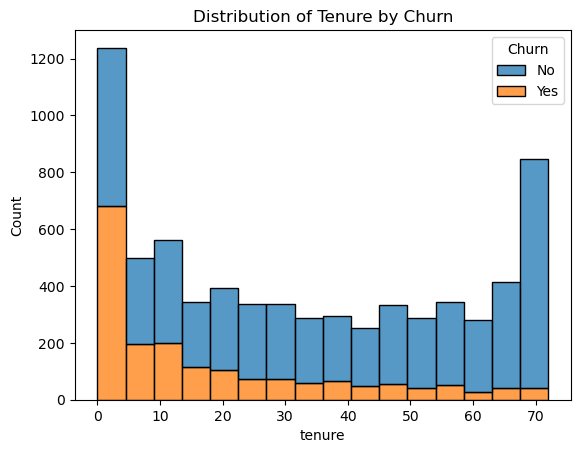

In [31]:
#Histogram
#Compare the distribution of a feature for churned and non-churned customers.
#Compare the distribution of tenure for churned and non-churned customers.
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack')
plt.title('Distribution of Tenure by Churn')
plt.show()


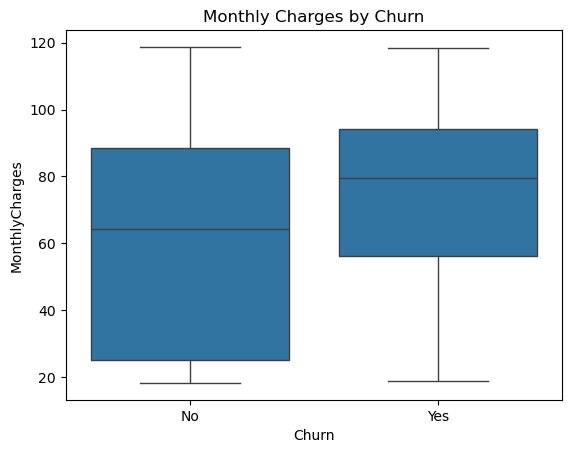

In [32]:
## Box Plots
##Visualize the median, quartiles, and outliers for a feature, comparing churned and non-churned groups
#Compare the distribution of MonthlyCharges for churned and non-churned customers.
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn')
plt.show()


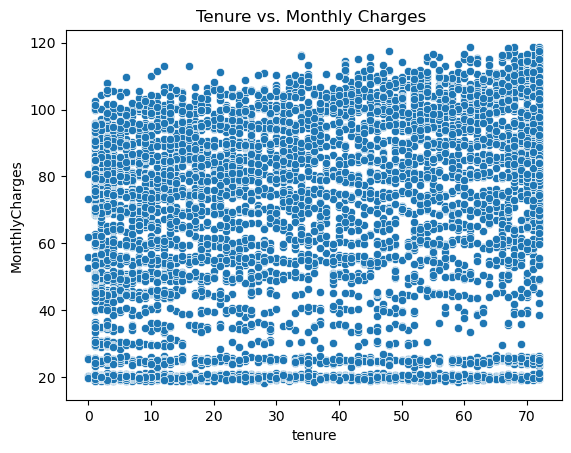

In [34]:
##Scatter Plots
# Visualize the relationship between two numerical features, color-coded by churn.
#Plot tenure against MonthlyCharges, with points colored by Churn
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges')
plt.title('Tenure vs. Monthly Charges ')
plt.show()

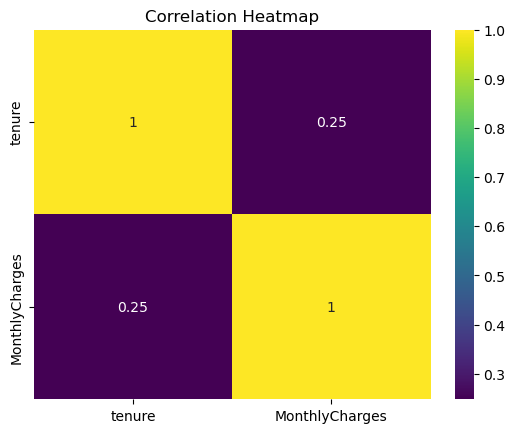

In [36]:
# Heatmap
#Create a heatmap to see if there are strong correlations between tenure, MonthlyCharges, and Churn.

sns.heatmap(df[['tenure', 'MonthlyCharges']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Grouped bar charts 
#are a useful visualization technique for comparing categorical data across different groups or categories. They are especially effective when you want to see how a specific variable changes based on different levels of another variable.

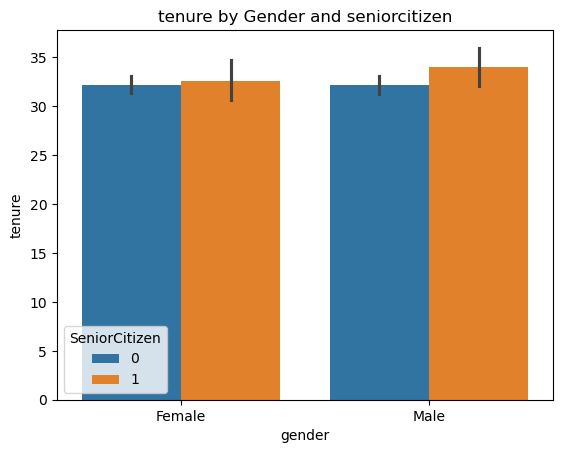

In [38]:
sns.barplot(x='gender', y='tenure', hue='SeniorCitizen', data=df)
plt.title('tenure by Gender and seniorcitizen')
plt.show()

When creating a grouped bar chart to compare categorical data, the height of each bar is usually calculated as the average value of a specific variable for that particular category within a group